# Homework 5: Probability (50 points)

**Reading**: Textbook chapter [9](https://www.inferentialthinking.com/chapters/09/Randomness) (focus on 9.4-9.5). Section 9.4 on the Monty Hall problem is a fun read.

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 5 is due Tuesday, 11/06 at 9:30am. Late work will not be accepted.  

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Catching Cheaters (12 points)

Suppose you are a casino owner, and your casino runs a very simple game of chance.  The dealer flips a coin.  The customer wins $\$$9 from the casino if it comes up heads and loses $\$$10 if it comes up tails.

**Question 1.** Assuming no one is cheating and the coin is fair, if a customer plays twice, what is the chance they make money?

In [6]:
# this question asks you to provide a number directly
p_winning_after_two_flips = 1 - (0.5*0.5) #probability of at least one win = 1 - probability of no wins
p_winning_after_two_flips

0.75

A certain customer plays the game 20 times and wins 13 of the bets.  You suspect that the customer is cheating!  That is, you think that their chance of winning is higher than the normal chance of winning.

You decide to test your hunch using the outcomes of the 20 games you observed.

**Question 2.** Write a function called `simulate`.  It should take no arguments.  It should return the number of wins in 20 games simulated under the assumption that the result of each game is sampled from a fair coin.

In [15]:
def simulate():
    possibilities = np.arange(0,2,1)
    n = 20
    list_number = np.random.choice(possibilities, n)
    wins = sum(list_number)
    return wins

simulate()

11

**Question 3.**  Using a 10,000 trial simulation, generate a histogram of the empirical distribution of the number of wins in 20 games.

<function matplotlib.pyplot.show>

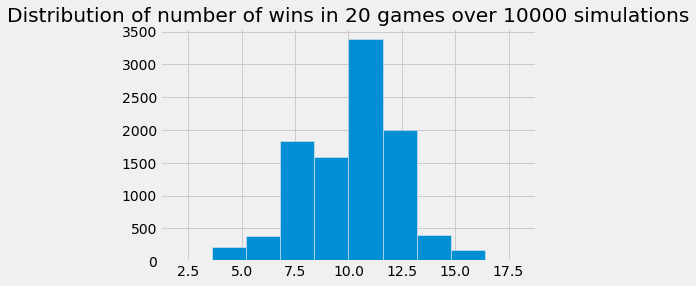

In [25]:
nsim=10000
wins_for_game = []
for i in range(nsim):
    wins_for_game.append(simulate())

plots.hist(wins_for_game)
plots.title("Distribution of number of wins in 20 games over 10000 simulations")
plots.show

**Question 4.** In the cell below, calculate the proporion of simulations for which you get 13 wins or more. Do your simulations suggest that the customer is cheating?

*Answer here:*  It does not suggest that the customer is cheating. The estimated probability of getting 13+ wins is about 13% which is not unreasonable. Yes, it's unlikely. But, it is totally possible. 

In [42]:
wins_table=Table().with_columns("Wins", wins_for_game)

sub_table = wins_table.where("Wins", are.above(12))
prop = sub_table.num_rows / wins_table.num_rows
prop


0.1327

## 2. How Many Devices? (12 points) ##

When a company produces medical devices, it must be sure that its devices will not fail.  Sampling is used ubiquitously in the medical device industry to test how well devices work.

Suppose you work at a company that produces syringes, and you are responsible for ensuring the syringes work well.  After studying the manufacturing process for the syringes, you have a hunch that they have a 1% failure rate.  That is, you suspect that 1% of the syringes won't work when a doctor uses them to inject a patient with medicine.

To test your hunch, you would like to find at least one faulty syringe.  You hire an expert consultant who can test a syringe to check whether it is faulty.  But the expert's time is expensive, so you need to avoid checking more syringes than you need to.

**Important note:** This exercise asks you to compute numbers that are related to probabilities.  For all questions, you can calculate your answer using algebra, **or** you can write and run a simulation to compute an approximately-correct answer (for practice, we suggest trying both.)  An answer based on an appropriate simulation will receive full credit.  If you simulate, use at least **10,000** trials. An answer based on algebra, should contain some explanation on how the calculation was done.

**Question 1.** Suppose there is indeed a 1% failure rate among all syringes.  If you check 20 syringes chosen at random from among all syringes, what is the chance that you find at least 1 faulty syringe?  (You may assume that syringes are chosen with replacement from a population in which 1% of syringes are faulty.)  Name your answer `chance_to_find_syringe`.

In [46]:
# For your convenience, we have created a list containing
# 99 copies of the number 0 (to represent good syringes)
# and 1 copy of the number 1 (to represent a bad syringe).
# This may be useful if you run a simulation.  Feel free
# to delete it.
faultiness = np.append(0*np.arange(99), 1)

##algebraically 
chance_to_find_syringe = 1 - (.99**20) ##prob(finding at least one) = 1 - prob(finding none)
chance_to_find_syringe

0.18209306240276923

**Question 2.** Continue to assume that there really is a 1% failure rate.  Find the smallest number of syringes you can check so that you have at least a 50% chance of finding a faulty syringe.  (Your answer should be an integer.)  Name that number `num_required_for_50_percent`.  **It's okay if your answer is off by as many as 11 for full credit.** 

In [56]:
import math
num_required_for_50_percent = round(math.log(0.5) / math.log(0.99))
# .99^x = .5
# xlog(.99) = log(.5)
# x = log(.5)/log(.99)
num_required_for_50_percent

69

**Question 3.** A doctor purchased 5 syringes and found 4 of them to be faulty. Assuming that there is indeed a 1% failure rate, what was the probability of **exactly 4** out of 5 syringes being faulty? 

In [50]:
probability_of_four_faulty = 5 * (.01**4) * (.99) #5C4 * prob(faulty)^4 * prob(good)^(5-4)
probability_of_four_faulty

4.95e-08

## 3. Poker Hands (26 points ) ##

This problem is about simulating poker hands from a deck of 52 cards and using that to calculate probability of various hands. Playing cards are shown below:

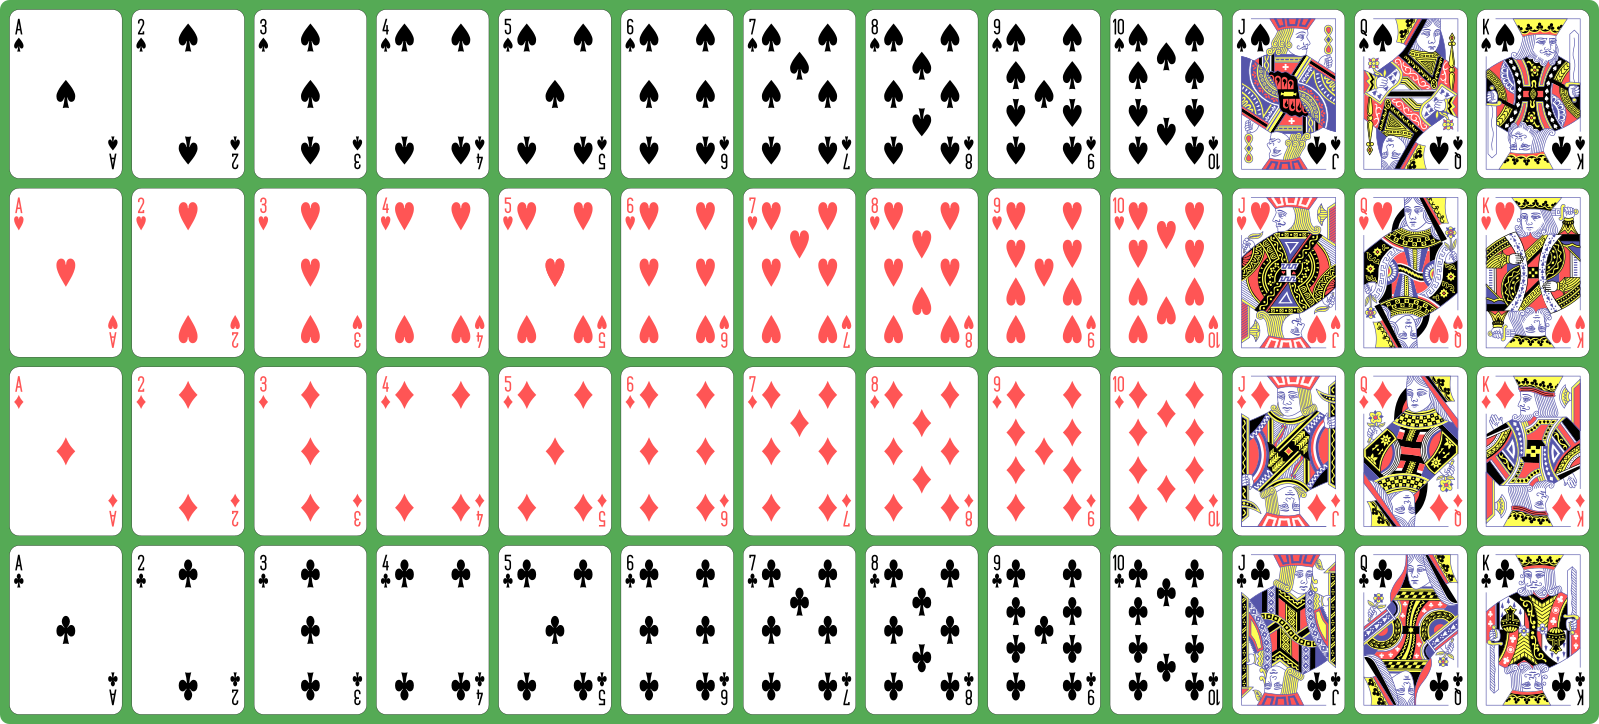


The 52-card deck includes 13 ranks of four suits: clubs (♣), diamonds (♦), hearts (♥) and spades (♠).


We will focus on a variation of the game of poker called Texas hold'em:
https://en.wikipedia.org/wiki/Texas_hold_%27em

In Texas hold'em, two cards, known as hole cards, are dealt face down to each player, and then five community cards are dealt face up in three stages. A player will see at different stage of the game: (i) only their two cards; (ii) five cards; (iii) six cards; (iv) seven cards.

On the above Wikipedia page you can also find a description of various hand values:
https://en.wikipedia.org/wiki/Texas_hold_%27em#Hand_values

**Question 1.** 
Write a function that simulates a draw of **n** cards, called `draw`. The function should have as input the integer n (we will use n=2,5,7). Two notes:
- the cards in poker are not returned into the pile until the end of a game (make sure that a draw cannot have two aces of heart for example - that's considered cheating!)
- you will use this function to calculate the probability of a pair, for example, so make sure you write it in a way that makes that easy.





In [99]:
# depending on how you program this function you might need 
# more lines of code before starting the definition of the function

def draw(n):
    cards = np.arange(0, 52, 1)
    return np.random.choice(cards, n, replace=False)


**Question 2.**
Write and run a simulation to estimate the probability of getting a pair of aces in a draw of two cards (because you use simulations, you get an approximately-correct answer; think carefully about the number of trials needed). A pair of aces is a combination of two of the any of the four aces.

In [110]:
def simulate_acepair(num_trials):
    ace_pairs = 0
    for i in range(num_trials):
        check = draw(2)
        if check[0] % 13 == 0 and check[1] % 13 == 0:
            ace_pairs = ace_pairs + 1
    return ace_pairs/num_trials

draw2get2aces = simulate_acepair(10000) 
draw2get2aces

# check_prob = 1/13 * 3/51 
# check_prob


0.0062

**Question 3.**

Write and run a simulation to estimate the probability of getting **a flush or a straight flush** in a draw of seven cards.  A flush consist of five cards all of the same suit (K♣ 10♣ 7♣ 6♣ 4♣). A straigh flush is a hand containing five cards of sequential rank, all of the same suit (5♠ 4♠ 3♠ 2♠ A♠). Note that because you draw seven cards, it is possible to also get six or seven cards of the same suit - and they will be considered a flush as well.

In [114]:
##estimated probability of getting a flush (including straight flushes)
def simulate_flush(num_trials):
    flush = 0
    for i in range(num_trials):
        hand = draw(7)
        suits = hand // 13
        counts = np.bincount(suits)
        for i in [5,6,7]:
            if i in counts:
                flush = flush + 1
                break
    return flush/num_trials

draw7getFlush= simulate_flush(10000)
draw7getFlush                
                
##A straight flush is contained within a flush, so this is the estimated probability of getting any sort of flush.
##It was very unclear of which 

0.0281

**Question 4.**

Write and run a simulation to estimate the probability of getting **a pair** in a draw of five cards. A pair is a combination of two cards of the same rank and three cards of three other ranks. The following hand is a pair (more precisely, a pair of fours):  4♥ 4♠ K♠ 10♦ 5♠. Note that if you get three cards of the same rank, it is not considered a pair (but it is called "three of a kind"). Make sure that you take into account the better hands: three of a kind, full house etc are not considered as a pair.

In [133]:
def simulate_1pair(num_trials):
    pair = 0
    for i in range(num_trials):
        hand = draw(5)
        numbers = hand % 13
        counts = np.bincount(numbers)
        if not 3 in counts:
            if 2 in counts:
                of_a_kind = np.bincount(counts)
                if of_a_kind[2] == 1:
                    pair = pair + 1
    return pair/num_trials

draw5get1pair = simulate_1pair(10000)
draw5get1pair


0.4214

In [134]:
hand = draw(5)
numbers = hand % 13
counts = np.bincount(numbers)
dups = np.bincount(counts)
hand, numbers, counts, dups

(array([35, 15, 41, 17, 21]),
 array([9, 2, 2, 4, 8]),
 array([0, 0, 2, 0, 1, 0, 0, 0, 1, 1]),
 array([6, 3, 1]))

##### **Question 5 (Optional for 5 extra points).**

Write and run a simulation to estimate the probability of getting precisely **a pair** in a draw of seven cards. Similalrly to Question 4, to answer this you need to take into account that getting a better hand (like a flush or a straight ) is not consider a pair even if two cards of the same rank are in that hand. 


In [145]:
def check_one_pair(hand):
    numbers = hand % 13
    counts = np.bincount(numbers)
    if not 3 in counts:
        if 2 in counts:
            of_a_kind = np.bincount(counts)
            if of_a_kind[2] == 1:
                return True
    return False
    
    
def check_flush(hand):
    suits = hand // 13
    counts = np.bincount(suits)
    for i in [5,6,7]:
        if i in counts:
            return True
    return False
            
    
def check_straight(hand):
    numbers = hand % 13
    sorted_nums = np.sort(numbers)
    sorted_unique_nums = np.unique(sorted_nums)
    difference = 0
    for i in range(len(sorted_unique_nums)-1):
        difference += sorted_unique_nums[i+1] - sorted_unique_nums[i]
        if difference == 5:
            return True
    return False

def simulate_1pair(num_trials):
    pair = 0
    for i in range(num_trials):
        hand = draw(7)
        if check_one_pair(hand) and not check_flush(hand) and not check_straight(hand):
            pair = pair + 1
    return pair/num_trials

draw7get1pair= simulate_1pair(10000)
draw7get1pair

0.2509